# 问题描述
用复化梯形公式$T_{n}=h\left(\frac{1}{2} f(a)+\sum_{j=1}^{n} f(a+i h)+\frac{1}{2} f(b)\right)$的自动控制误差算法求积分$I=\int_{a}^{b} f(x) d x$
* 说明：
下面的程序编写中以$\frac{\sin (x)}{x}$作为被积函数，计算积分
$$\int_{0}^{1} \frac{\sin (x)}{x}$$
要求计算精度满足$\left|T_{2 n}-T_{n}\right|<\varepsilon=10^{-7}$

# 求解

In [1]:
import math
def f(x):
    """f(x)表示被积函数"""
    return math.sin(x)/x

C:\Users\13738\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


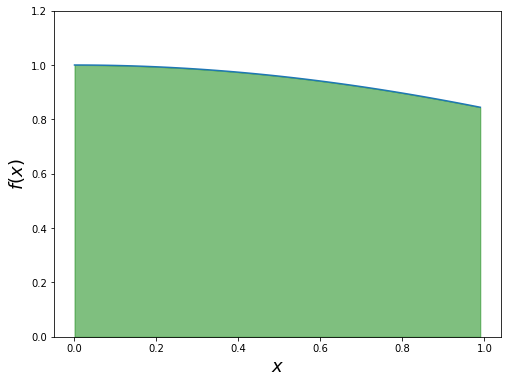

In [2]:
#图像绘制
import numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline
x_ = np.arange(0,1,0.01)
y_=[]
for i in x_:
    y_.append(f(i))
y_[0]=1


fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x_, y_)
ax.fill_between(x_,y_, color='green', alpha=0.5)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$f(x)$", fontsize=18)
ax.set_ylim(0, 1.2)
plt.show()

In [3]:
import time

## 梯形法递推求解

In [4]:
def variableStepLadder(a,b,err):
    """递推梯形法，
        a,b为区间，err为精度，
        返回积分结果"""
    #准备初值
    h=b-a
    T1=h*(1+f(b))/2
    while True:
        #求二分后的梯形值
        S=0
        x=a+h/2
        while True:
            S=S+f(x)
            x=x+h
            if x>=b:
                break
        T2=T1/2+h*S/2
        if abs(T2-T1)<err: #控制精度
            break
        else:  #改步长
            h=h/2
            T1=T2
    return T2
        

In [5]:
start=time.clock()
err=0.0000001
ans=variableStepLadder(0,1,err)
end=time.clock()
print("控制精度为"+str(err)+"时，梯形递推积分结果为："+str(ans))
print("running time:"+str(end-start))

控制精度为1e-07时，梯形递推积分结果为：0.946083046432447
running time:0.000805100000000003


C:\Users\13738\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\Users\13738\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


## Romberg积分算法求积分

In [6]:
def Romberg(a,b,err):
    """龙贝格算法，
       a,b为求解区间,err为精度
       返回积分结果"""
    h=b-a
    T1=(1+f(b))*h/2
    k=1
    while True:
        S=0
        x=a+h/2
        while True:
            S=S+f(x)
            x=x+h
            if x>=b:
                break
        T2=T1/2+h*S/2
        S2=T2+(T2-T1)/3
        if k==1:
            k=k+1
            h=h/2
            T1=T2
            S1=S2
            continue
        else:
            C2=S2+(S2-S1)/15
        if k==2:
            C1=C2
            k=k+1
            h=h/2
            T1=T2
            S1=S2
            continue
        else:
            R2=C2+(C2-C1)/63
        if k==3:
            R1=R2
            C1=C2
            k=k+1
            h=h/2
            T1=T2
            S1=S2
            continue
        else:
            if abs(R2-R1)<err:
                break
            else:
                R1=R2
            C1=C2
            k=k+1
            h=h/2
            T1=T2
            S1=S2
            continue           
    return R2

In [7]:
start=time.clock()
err=0.0000001
ans=Romberg(0,1,err)
end=time.clock()
print("控制精度为"+str(err)+"时，龙贝格积分结果为："+str(ans))
print("running time:"+str(end-start))

控制精度为1e-07时，龙贝格积分结果为：0.9460830703672595
running time:9.199999999998099e-05


C:\Users\13738\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\Users\13738\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


# 标准结果
通过scipy库中的`integrate.quad(f, a, b)`函数返回的值作为标准结果

In [8]:
from scipy import integrate
v, err = integrate.quad(f, 0, 1)
print("参考结果为:"+str(v))


参考结果为:0.9460830703671831
